
## Roshan Xavier

## Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing both the datasets matches and deliveries as data_m and data_d

data_m = pd.read_csv("matches.csv", index_col=0)
data_d = pd.read_csv("deliveries.csv", index_col=0)

In [3]:
# Checking the shape of the datasets

data_m.shape

(756, 17)

In [4]:
data_d.shape

(179078, 20)

In [5]:
# Checking the info of both the datasets

data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [6]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

In [7]:
# Describing the data of both datasets

data_m.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [8]:
data_d.describe()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
# Replacing the detailed team names with their abbrevations

data_m.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

In [10]:
data_d.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

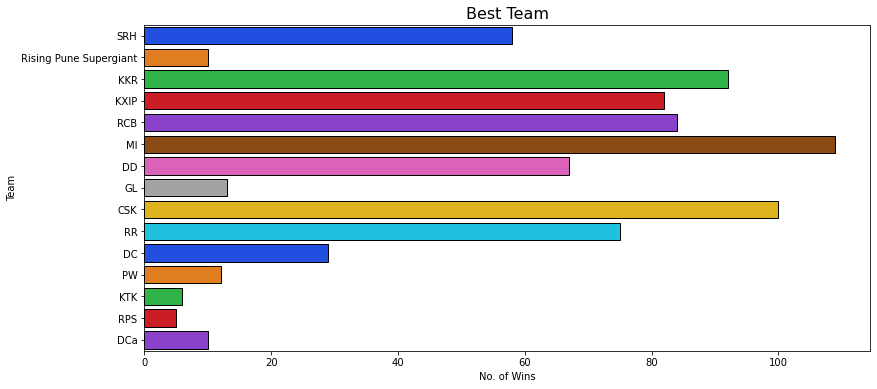

In [11]:
# Team with most IPL match wins

plt.figure(figsize = (13,6))
sns.countplot(y = data_m['winner'], palette = 'bright', edgecolor = 'black')
plt.title('Best Team', size = 16)
plt.ylabel('Team')
plt.xlabel('No. of Wins')
plt.show()

Based on the total number of match wins in IPL history, <b>Mumbai Indians</b> takes the lead followed by <b>Chennai Super Kings</b>

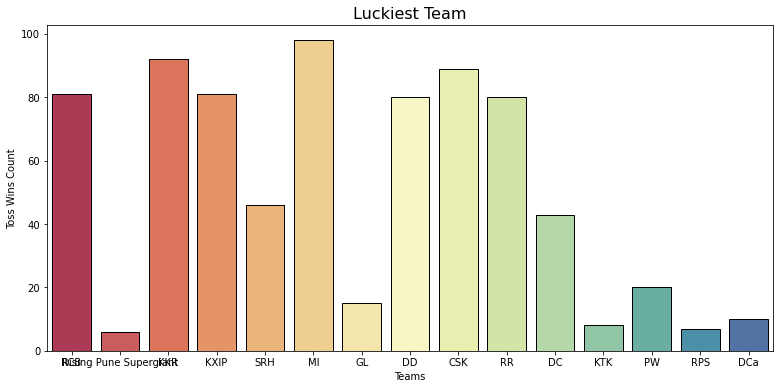

In [12]:
# Team with the most toss wins till date

plt.figure(figsize = (13,6))
sns.countplot(x = data_m['toss_winner'], palette = 'Spectral', edgecolor = 'black')
plt.title('Luckiest Team', size = 16) 
plt.ylabel('Toss Wins Count')
plt.xlabel('Teams')
plt.show()

Again we can notice that <b>Mumbai Indians</b> have the highest toss win count.

Now there seems to be a relation between toss wins and match wins. Let's check the same by making use of a pie chart.

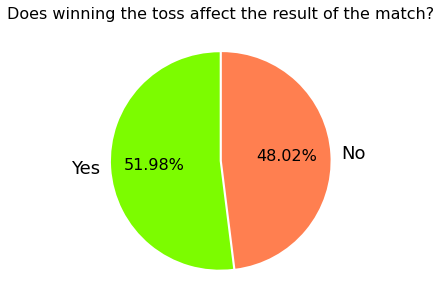

In [13]:
# Does winning the toss affect the result of the match

toss = data_m.loc[data_m['toss_winner'] == data_m['winner']]
data = [len(toss), len(data_m)-len(toss)]
fig, ax = plt.subplots(figsize = (5, 5))
wedges, texts, autotexts = ax.pie(data, labels = ['Yes', 'No'], startangle = 90, explode = (.01,.01) , autopct = '%1.2f%%', colors=['lawngreen','coral'])
plt.title('Does winning the toss affect the result of the match?', size = 16, loc = 'center')
plt.setp(texts, size = 18)
plt.setp(autotexts, size = 16)
plt.show()

Here, we can notice that there is a minor chance that the winner of the toss may win the match.

Now arises the question on what do team prefer after winning the toss, do they prefer to Field or Bat?

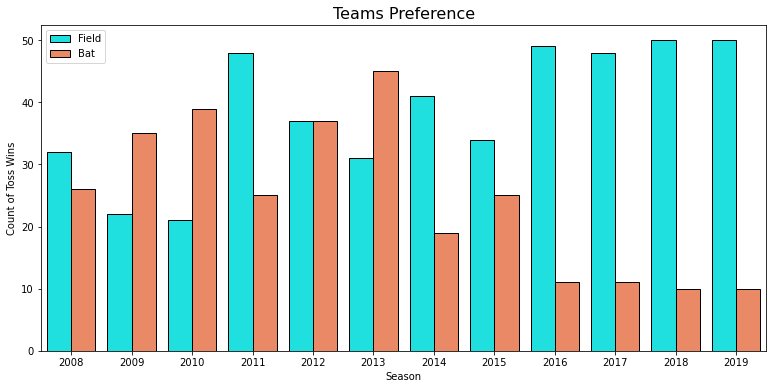

In [14]:
# Team preference after winning the toss

plt.figure(figsize = (13,6))
sns.countplot(x = data_m['season'], hue = data_m['toss_decision'], palette = dict(field = 'aqua', bat = 'coral'), edgecolor = 'black')
plt.title('Teams Preference', size = 16)
plt.ylabel('Count of Toss Wins')
plt.xlabel('Season')
plt.legend(('Field', 'Bat'))
plt.show()

It can be noticed quite clearly that nowadays team have decided to Field first, maybe because it is easier to chase the score.

Let us check this to by making use of another plot.

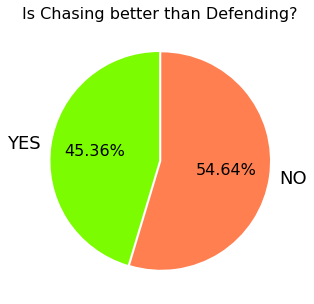

In [15]:
bat_first = data_m.loc[data_m['win_by_runs'] != 0]
bat_second = data_m.loc[data_m['win_by_wickets'] != 0]

data = [len(bat_first), len(bat_second)]
ilabels=['YES', 'NO']
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels = ilabels, startangle = 90, explode = (.01,.01), autopct = '%1.2f%%',
                                  colors=['lawngreen','coral'])
plt.title('Is Chasing better than Defending?',size = 16)
plt.setp(texts, size = 18)
plt.setp(autotexts, size = 16)
plt.show()

Based on the statistics again we can notice that there isnt any major difference between chasing and defending, thus it is safe to say that winning or losing has more to the performance than chasing or defending.

Now that we have looked at some of the match probabilities, lets now have a look at the performance of players in the match.

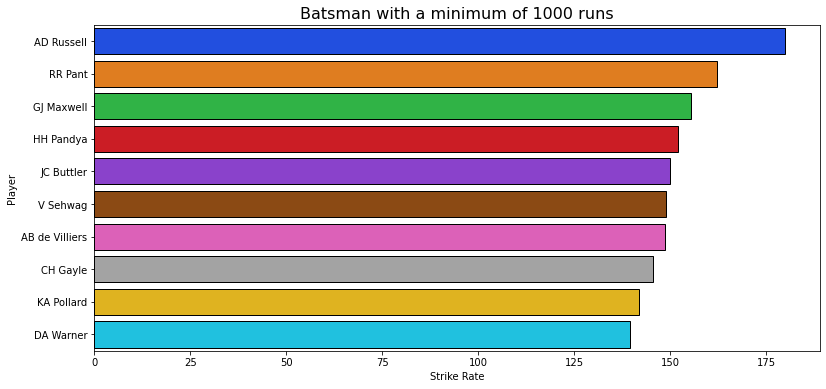

In [16]:
# Batsmen who have scored a minimum of 1000 runs 

strike_rate = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = data_d.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1000].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(13,6))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='bright', edgecolor='black')
plt.title('Batsman with a minimum of 1000 runs', size = 16)
plt.ylabel('Player')
plt.xlabel('Strike Rate')
plt.show()

Here we can notice that <b>AD Russell</b> tops the charts with a strike rate of over 175 followed by <b>RR Pant</b> with a strike rate over 160.

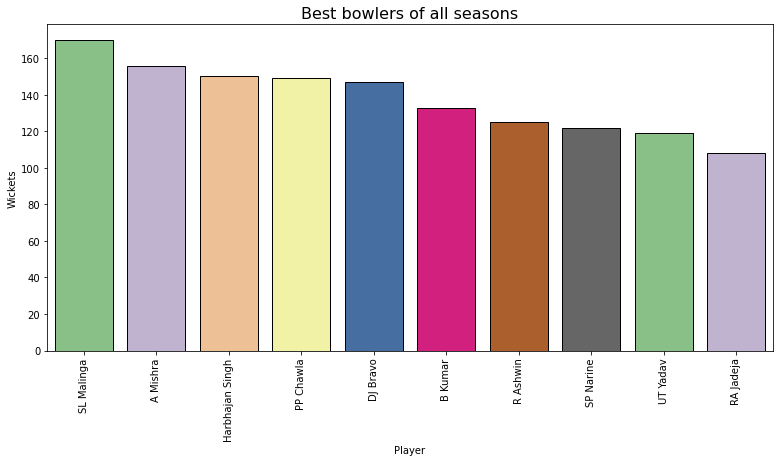

In [17]:
# Best bowlers of all seasons

dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = data_d.loc[data_d['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize = (13,6))
sns.barplot(x = best_bowler['bowler'], y = best_bowler['wickets'], palette = 'Accent', edgecolor = 'black')
plt.xticks(rotation = 'vertical')
plt.title('Best bowlers of all seasons', size = 16)
plt.ylabel('Wickets')
plt.xlabel('Player')
plt.show()

When we consider the bowlers with most wickets in the season <b>SL Malinga</b> tops the charts with 160+ wickets followed by <b>A Mishra</b> with 150+ wickets.

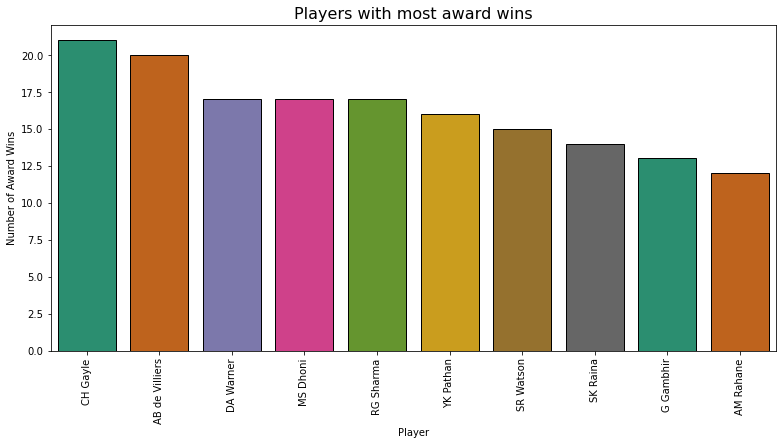

In [18]:
# Players with most award wins

most_mom = data_m['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize = (13, 6))
sns.barplot(x = most_mom['Player'], y = most_mom['No. of Awards'], palette = 'Dark2', edgecolor = 'black')
plt.xticks(rotation ='vertical')
plt.title('Players with most award wins', size = 16)
plt.ylabel('Number of Award Wins')
plt.xlabel('Player')
plt.show()

Here we can notice that <b>CH Gayle</b> has won the most number of awards so far followed by <b>AB de Villiers</b>

Now, lets try to understand if playing Away or on Home ground brings any difference in the outcome of the match.

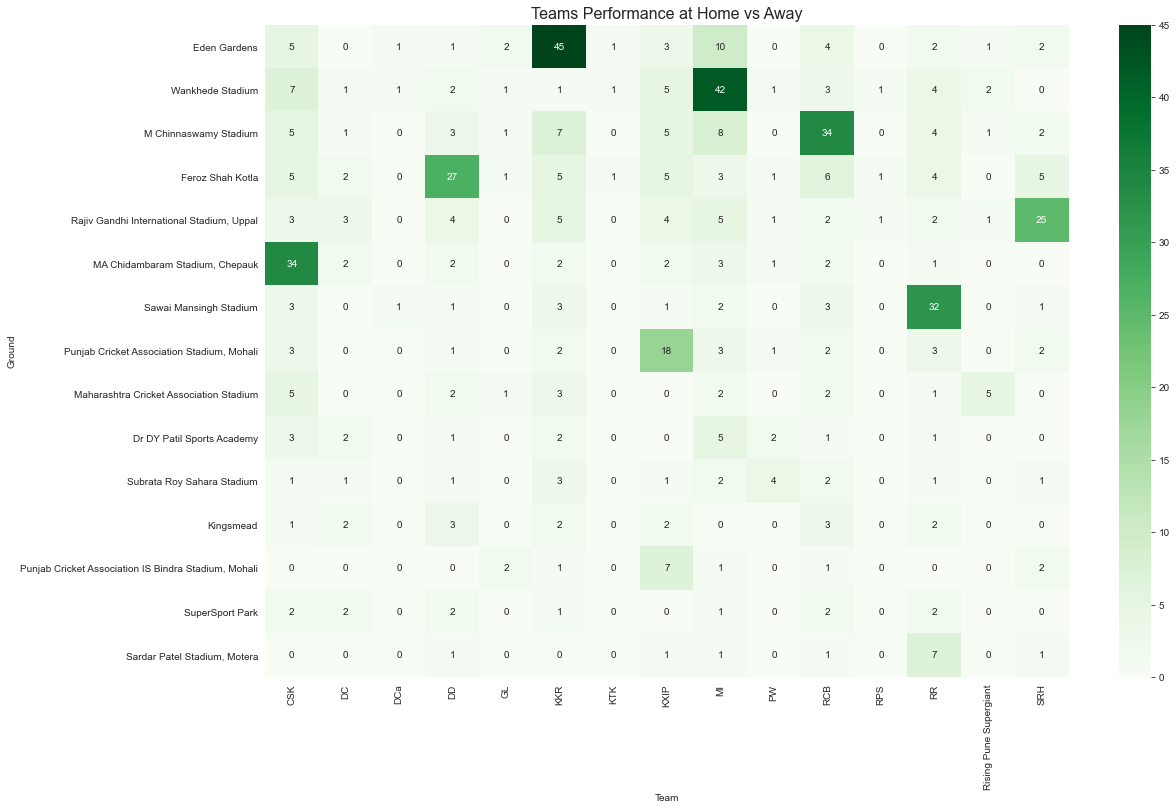

In [19]:
venue = data_m.groupby(['venue','winner']).count()
venue = venue.iloc[:-1,:1].reset_index()
venue = venue.rename(columns={'season':'wins'})
venue = venue.pivot('venue','winner','wins')
venue.fillna(0,inplace=True)
venue['total'] = venue.sum(axis=1,skipna=False)
venue = venue.sort_values(by=['total'], ascending=False).head(15)
venue.drop(['total'], axis=1, inplace=True)

sns.set_style('dark')
plt.figure(figsize=(18,12))
sns.heatmap(data=venue, annot=True, cmap='Greens')
plt.xlabel('Team')
plt.ylabel('Ground')
plt.title('Teams Performance at Home vs Away', size = 16)
plt.show()


Most of the Teams like <b>MI, KKR and CSK</b> have performed exceptionally well at their home ground, whereas there is no Team who is dominant at away grounds. So, Home advantage is very crucial for most teams.